

### Importing the necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import skimage.io as sk
from skimage import img_as_ubyte
from skimage.io import imread
from scipy import spatial
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, MaxPooling2D, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
from PIL import Image
import cv2
import matplotlib.pyplot as plt

### Displaying the of Image of Forge and Real Signature

Text(0.5, 1.0, 'Forge_10')

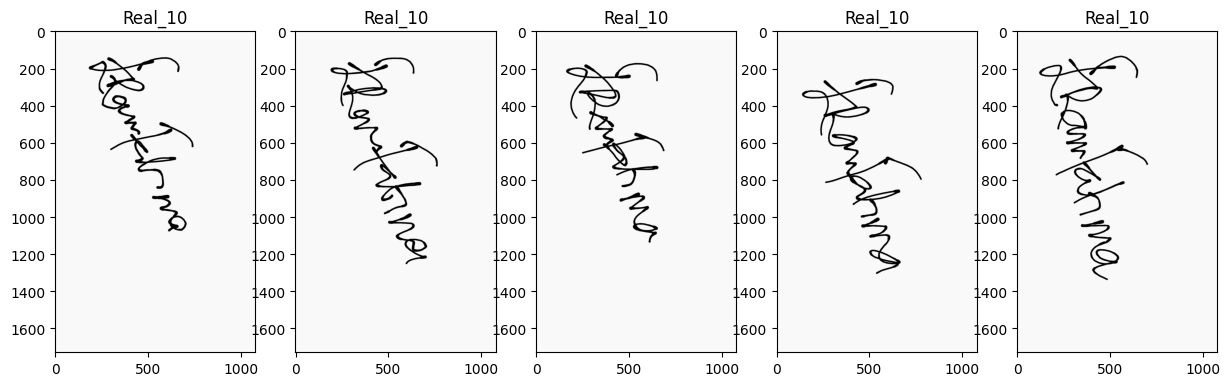

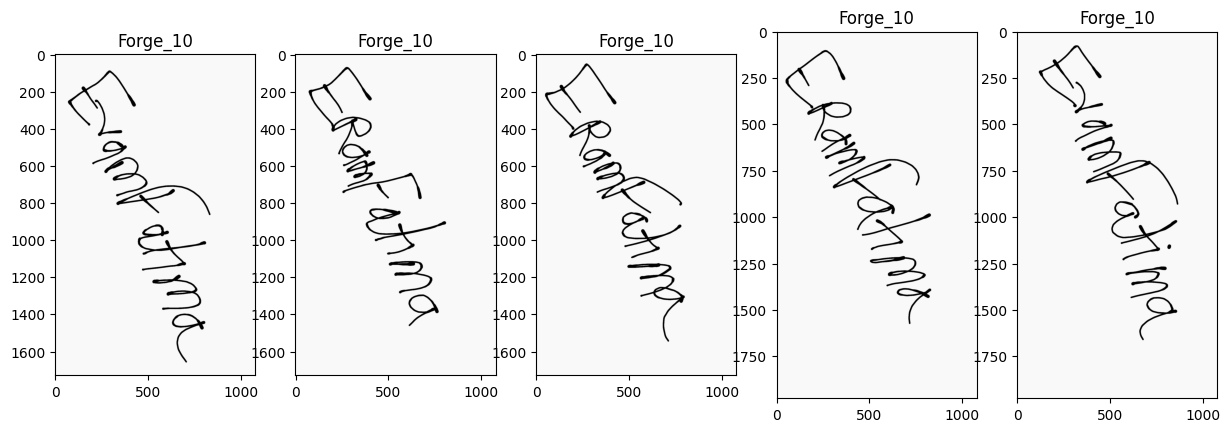

In [ ]:
image1 = sk.imread("/content/drive/MyDrive/Lakshmi Meghana/signature python/signature_forgery_python/forgery of signature python/train/real/u09_s2_g01_Im.png")
image2 = sk.imread("/content/drive/MyDrive/Lakshmi Meghana/signature python/signature_forgery_python/forgery of signature python/train/real/u09_s2_g02_Im.png")
image3 = sk.imread("/content/drive/MyDrive/Lakshmi Meghana/signature python/signature_forgery_python/forgery of signature python/train/real/u09_s2_g03_Im.png")
image4 = sk.imread("/content/drive/MyDrive/Lakshmi Meghana/signature python/signature_forgery_python/forgery of signature python/train/real/u09_s2_g04_Im.png")
image5 = sk.imread("/content/drive/MyDrive/Lakshmi Meghana/signature python/signature_forgery_python/forgery of signature python/train/real/u09_s2_g05_Im.png")

fig, ax = plt.subplots(1,5, figsize = (15,10))

ax[0].imshow(image1)
ax[0].set_title("Real_10")
ax[1].imshow(image2)
ax[1].set_title("Real_10")
ax[2].imshow(image3)
ax[2].set_title("Real_10")
ax[3].imshow(image4)
ax[3].set_title("Real_10")
ax[4].imshow(image5)
ax[4].set_title("Real_10")

image6 = sk.imread("/content/drive/MyDrive/Lakshmi Meghana/signature python/signature_forgery_python/forgery of signature python/train/forge/u09_s2_f01_Im.png")
image7 = sk.imread("/content/drive/MyDrive/Lakshmi Meghana/signature python/signature_forgery_python/forgery of signature python/train/forge/u09_s2_f02_Im.png")
image8 = sk.imread("/content/drive/MyDrive/Lakshmi Meghana/signature python/signature_forgery_python/forgery of signature python/train/forge/u09_s2_f03_Im.png")
image9 = sk.imread("/content/drive/MyDrive/Lakshmi Meghana/signature python/signature_forgery_python/forgery of signature python/train/forge/u09_s2_f04_Im.png")
image10 = sk.imread("/content/drive/MyDrive/Lakshmi Meghana/signature python/signature_forgery_python/forgery of signature python/train/forge/u09_s3_f01_Im.png")

fig, ax1 = plt.subplots(1,5, figsize = (15,10))

ax1[0].imshow(image6)
ax1[0].set_title("Forge_10")
ax1[1].imshow(image7)
ax1[1].set_title("Forge_10")
ax1[2].imshow(image8)
ax1[2].set_title("Forge_10")
ax1[3].imshow(image9)
ax1[3].set_title("Forge_10")
ax1[4].imshow(image10)
ax1[4].set_title("Forge_10")

In [ ]:
train_path = '/content/drive/MyDrive/Lakshmi Meghana/signature python/signature_forgery_python/forgery of signature python/train'
test_path = '/content/drive/MyDrive/Lakshmi Meghana/signature python/signature_forgery_python/forgery of signature python/test'

In [ ]:
Image_Width = 512
Image_Height = 512
Image_Size = (Image_Width, Image_Height)
Image_Channel = 3
batch_size=15

In [ ]:
model = Sequential()

## Conv layer 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(Image_Width,Image_Height, Image_Channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 4
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 5
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 6
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 510, 510, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 255, 255, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 253, 253, 64)     2

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [early_stop, learning_rate_reduction]


In [ ]:
# Scaling all the images between 0 to 1 and applying Data Augmentation

train_datagen = ImageDataGenerator(rotation_range=15,
                                  rescale=1./255,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Lakshmi Meghana/signature python/signature_forgery_python/forgery of signature python/train',
                                              target_size=Image_Size,
                                              batch_size=32,
                                              class_mode = 'categorical')


Found 75 images belonging to 2 classes.


In [ ]:
# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Lakshmi Meghana/signature python/signature_forgery_python/forgery of signature python/test',
                                                  target_size=Image_Size,
                                                  batch_size = 32,
                                                  class_mode='categorical')

Found 75 images belonging to 2 classes.


In [ ]:
epochs = 10

history = model.fit_generator(train_generator,
                             epochs=epochs,
                             validation_data=test_generator,
                             validation_steps=len(test_generator),
                             steps_per_epoch=len(train_generator),
                             callbacks=callbacks)

<ipython-input-14-1c90feb57288>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
3/3 [==============================] - ETA: 0s - loss: 1.5104 - accuracy: 0.5733

3/3 [==============================] - 110s 30s/step - loss: 1.5104 - accuracy: 0.5733 - val_loss: 0.7275 - val_accuracy: 0.3733 - lr: 0.0010
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: 1.3818 - accuracy: 0.5600

3/3 [==============================] - 9s 3s/step - loss: 1.3818 - accuracy: 0.5600 - val_loss: 0.6012 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 3/10
3/3 [==============================] - ETA: 0s - loss: 1.0132 - accuracy: 0.6133

3/3 [==============================] - 9s 4s/step - loss: 1.0132 - accuracy: 0.6133 - val_loss: 0.7197 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 4/10
3/3 [==============================] - ETA: 0s - loss: 0.8044 - accuracy: 0.6800

3/3 [==============================] - 10s 4s/step - loss: 0.8044 - accuracy: 0.6800 - val_loss: 1.0232 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 5/10
3/3 [==============================] - ETA: 0s - loss: 0.9258 - accuracy: 0.5867

3/3 [==============================] - 9s 4s/step - loss: 0.9258 - accuracy: 0.5867 - val_loss: 3.0313 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 6/10
3/3 [==============================] - ETA: 0s - loss: 0.8395 - accuracy: 0.6533

3/3 [==============================] - 9s 3s/step - loss: 0.8395 - accuracy: 0.6533 - val_loss: 4.6237 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 7/10
3/3 [==============================] - ETA: 0s - loss: 0.5450 - accuracy: 0.7067

3/3 [==============================] - 10s 3s/step - loss: 0.5450 - accuracy: 0.7067 - val_loss: 5.4723 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 8/10
3/3 [==============================] - ETA: 0s - loss: 0.8228 - accuracy: 0.6133

3/3 [==============================] - 10s 4s/step - loss: 0.8228 - accuracy: 0.6133 - val_loss: 4.9334 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 9/10
3/3 [==============================] - ETA: 0s - loss: 0.5578 - accuracy: 0.7600

3/3 [==============================] - 9s 3s/step - loss: 0.5578 - accuracy: 0.7600 - val_loss: 4.0298 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 10/10
3/3 [==============================] - ETA: 0s - loss: 0.8964 - accuracy: 0.6133

3/3 [==============================] - 10s 3s/step - loss: 0.8964 - accuracy: 0.6133 - val_loss: 2.9599 - val_accuracy: 0.3333 - lr: 0.0010


## Plotting the Accuracy and Losses

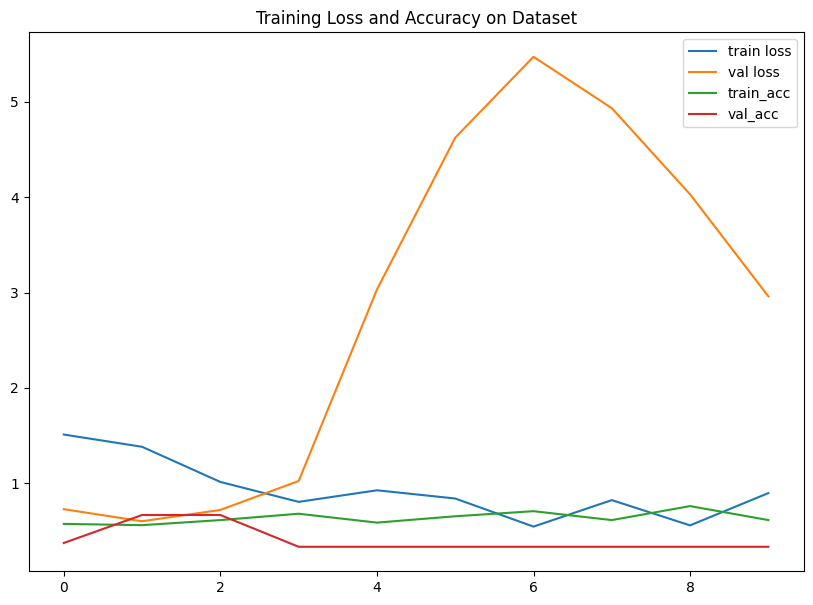

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Training Loss and Accuracy on Dataset")
plt.legend()
plt.show()
plt.savefig('lossval_loss')

## Saving model

In [ ]:
from tensorflow.keras.models import load_model

model.save('forge_real_signature_model.h5')

## Making prediction with  model

In [ ]:
pred = model.predict(test_generator)
pred

3/3 [==============================] - 2s 614ms/step


array([[0.98312473, 0.01687524],
       [0.98101085, 0.01898918],
       [0.98667693, 0.01332304],
       [0.98711234, 0.01288761],
       [0.9834599 , 0.01654006],
       [0.9886541 , 0.01134595],
       [0.9881002 , 0.01189985],
       [0.9856086 , 0.01439148],
       [0.9859197 , 0.01408028],
       [0.98958266, 0.01041735],
       [0.98530537, 0.01469465],
       [0.98758674, 0.01241333],
       [0.9901383 , 0.00986166],
       [0.9855494 , 0.01445063],
       [0.98768544, 0.01231453],
       [0.9894471 , 0.01055286],
       [0.9869183 , 0.01308168],
       [0.9893903 , 0.0106097 ],
       [0.98781395, 0.01218606],
       [0.9868608 , 0.01313916],
       [0.98663807, 0.01336196],
       [0.9862381 , 0.01376189],
       [0.9889342 , 0.01106578],
       [0.9857049 , 0.01429504],
       [0.9849583 , 0.01504174],
       [0.98528904, 0.01471098],
       [0.99013036, 0.00986962],
       [0.98718566, 0.01281435],
       [0.9834382 , 0.01656176],
       [0.9895481 , 0.01045186],
       [0.

In [ ]:
import numpy as np

pred = np.argmax(pred, axis=1)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

## Loading model

In [ ]:
model = load_model('forge_real_signature_model.h5')

In [ ]:
from tensorflow.keras.preprocessing import image

img = image.load_img('/content/drive/MyDrive/Lakshmi Meghana/signature python/signature_forgery_python/forgery of signature python/test/real/u014_s1_g01_Im.png', target_size=(512,512))

In [ ]:
x = image.img_to_array(img)
x

array([[[249., 249., 249.],
        [249., 249., 249.],
        [249., 249., 249.],
        ...,
        [249., 249., 249.],
        [249., 249., 249.],
        [249., 249., 249.]],

       [[249., 249., 249.],
        [249., 249., 249.],
        [249., 249., 249.],
        ...,
        [249., 249., 249.],
        [249., 249., 249.],
        [249., 249., 249.]],

       [[249., 249., 249.],
        [249., 249., 249.],
        [249., 249., 249.],
        ...,
        [249., 249., 249.],
        [249., 249., 249.],
        [249., 249., 249.]],

       ...,

       [[249., 249., 249.],
        [249., 249., 249.],
        [249., 249., 249.],
        ...,
        [249., 249., 249.],
        [249., 249., 249.],
        [249., 249., 249.]],

       [[249., 249., 249.],
        [249., 249., 249.],
        [249., 249., 249.],
        ...,
        [249., 249., 249.],
        [249., 249., 249.],
        [249., 249., 249.]],

       [[249., 249., 249.],
        [249., 249., 249.],
        [249., 2

In [ ]:
x.shape

(512, 512, 3)

In [ ]:
x = x/255

from tensorflow.keras.applications.resnet50 import preprocess_input

x=np.expand_dims(x,axis=0)


In [ ]:
result=model.predict(img_data)
print(result)

NameError: ignored

In [ ]:
result=np.argmax(model.predict(img_data), axis=0)

In [ ]:
if (result[0]== 1):
    print("The signature is not fraud")
else:
    print("The signature is fraud")

The signature is fraud


In [ ]:
from tensorflow.keras.models import load_model

model.save_weights("model_forge.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
model_json=model.to_json()
with open("model_forge.json", "w") as json_file:
    json_file.write(model_json)